
# Lesson: N-grams, Stopwords, and NER Practice in spaCy

This notebook covers key NLP preprocessing techniques and rule-based matching:
1. **N-grams**: Extract sequences of `n` consecutive words to capture local context in text.
2. **Stopwords**: Remove common words that provide little semantic value (e.g., "the", "and").

These concepts are essential for preparing text data and extracting meaningful insights.
    


## N-grams

An n-gram is a sequence of `n` doc (words).

- **Unigram**: Individual doc (e.g., ["This", "is", "a", "test"]).
- **Bigram**: Two consecutive doc (e.g., ["This is", "is a", "a test"]).
- **Trigram**: Three consecutive doc (e.g., ["This is a", "is a test"]).

Why Use N-grams?
- Improve performance of text classification or sentiment analysis models
- Capture domain-specific phrases (e.g., “artificial intelligence”)
- Enrich feature representations beyond single word representations

[spaCy Universe](https://spacy.io/universe)

In [1]:
# Load and import spacy model
# !pip install spacy
# !python -m spacy download en_core_web_sm
import spacy

nlp = spacy.load("en_core_web_sm")

In [2]:
# Load the textacy library
# !pip install textacy

[textacy ngrams documentation](https://github.com/chartbeat-labs/textacy/blob/main/src/textacy/extract/basics.py)

In [3]:
from textacy.extract.basics import ngrams

doc = nlp("Natural language processing isn't fascinating.")

print(list(ngrams(doc, 2, filter_stops=False)))

[Natural language, language processing, processing is, isn't, n't fascinating]


In [4]:
# Generate unigrams, bigrams, and trigrams
print("Unigrams:", list(ngrams(doc, 1, filter_stops=False)))
print("Bigrams:", list(ngrams(doc, 2, filter_stops=False)))
print("Trigrams:", list(ngrams(doc, 3, filter_stops=False)))

Unigrams: [Natural, language, processing, is, n't, fascinating]
Bigrams: [Natural language, language processing, processing is, isn't, n't fascinating]
Trigrams: [Natural language processing, language processing is, processing isn't, isn't fascinating]


### N-Grams Example: Into the Spider-Verse

### 1) Load and Process the Script

In [5]:
# Define the file path to save the text
spider_script = '/content/into_the_spiderverse.txt'

# Writing the multiline string to the text file
with open(spider_script, 'r', encoding='utf-8') as f:
    spidey_text = f.read()

print(spidey_text)

﻿SPIDER-MAN: INTO THE SPIDER-VERSE Screenplay by Phil Lord and Rodney Rothman Story by Phil Lord Dec. 3, 2018 SEQ. 0100 - THE ALTERNATE SPIDER-MAN “TAS” WE BEGIN ON A COMIC. The cover asks WHO IS SPIDER-MAN? SPIDER-MAN (V.O.) Alright, let’s do this one last time. My name is Peter Parker. QUICK CUTS of a BLOND PETER PARKER Pulling down his mask...a name tag that reads “Peter Parker”...various shots of Spider-Man IN ACTION. SPIDER-MAN (V.O.) I was bitten by a radioactive spider and for ten years I’ve been the one and only Spider-Man. I’m pretty sure you know the rest. UNCLE BEN tells Peter: UNCLE BEN (V.O.) With great power comes great responsibility. Uncle Ben walks into the beyond. SPIDER-MAN (V.O.) I saved a bunch of people, fell in love, saved the city, and then I saved the city again and again and again... Spiderman saves the city, kisses MJ, saves the city some more. The shots evoke ICONIC SPIDER-MAN IMAGES, but each one is subtly different, somehow altered. SPIDER-MAN (V.O.) And u

#### 2) Generate N-grams

In [6]:
# Create a doc container for the spiderverse text
doc = nlp(spidey_text)

# Generate unigrams, bigrams, and trigrams
print("Unigrams:", list(ngrams(doc, 1, filter_stops=False)))
print("Bigrams:", list(ngrams(doc, 2, filter_stops=False)))
print("Trigrams:", list(ngrams(doc, 3, filter_stops=False)))

Unigrams: [﻿SPIDER, MAN, INTO, THE, SPIDER, VERSE, Screenplay, by, Phil, Lord, and, Rodney, Rothman, Story, by, Phil, Lord, Dec., 3, 2018, SEQ, 0100, THE, ALTERNATE, SPIDER, MAN, TAS, WE, BEGIN, ON, A, COMIC, The, cover, asks, WHO, IS, SPIDER, MAN, SPIDER, MAN, V.O., Alright, let, ’s, do, this, one, last, time, My, name, is, Peter, Parker, QUICK, CUTS, of, a, BLOND, PETER, PARKER, Pulling, down, his, mask, a, name, tag, that, reads, Peter, Parker”, various, shots, of, Spider, Man, IN, ACTION, SPIDER, MAN, V.O., I, was, bitten, by, a, radioactive, spider, and, for, ten, years, I, ’ve, been, the, one, and, only, Spider, Man, I, ’m, pretty, sure, you, know, the, rest, UNCLE, BEN, tells, Peter, UNCLE, BEN, V.O., With, great, power, comes, great, responsibility, Uncle, Ben, walks, into, the, beyond, SPIDER, MAN, V.O., I, saved, a, bunch, of, people, fell, in, love, saved, the, city, and, then, I, saved, the, city, again, and, again, and, again, Spiderman, saves, the, city, kisses, MJ, saves

#### 3) Visualizing N-gram Frequencies

You can use `collections.Counter` and `matplotlib` to visualize the most frequent bigrams in the text.

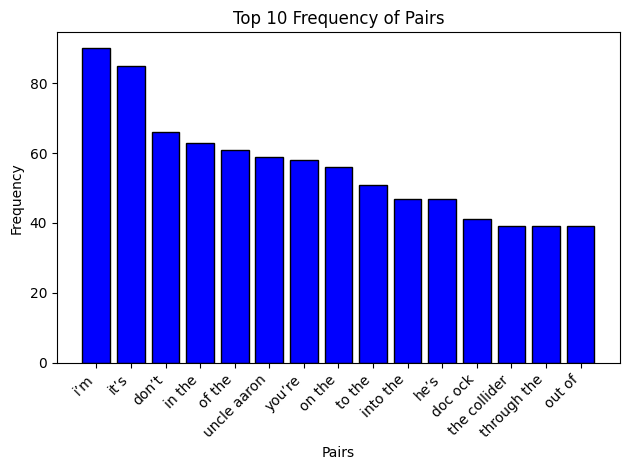

In [7]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming `doc` is defined and `ngrams` function is available
# Get bigrams as Span objects
data = list(ngrams(doc, 2, filter_stops=False))

# Count occurrences of each pair
pair_counts = Counter(span.text.lower() for span in data)

# Get the top 10 most common pairs
top_10_pairs = pair_counts.most_common(15)

# Extract pairs and their frequencies
pairs, frequencies = zip(*top_10_pairs)

# Plot histogram
plt.bar(pairs, frequencies, color='blue', edgecolor='black')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel('Pairs')
plt.ylabel('Frequency')
plt.title('Top 10 Frequency of Pairs')

# Show plot
plt.tight_layout()
plt.show()


## Stopwords

Stopwords are common words like "the", "is", and "and" that typically add little meaning to a sentence. Removing stopwords can help reduce noise in text data.

Below, we demonstrate how to remove stopwords using the `spaCy` library.
        

In [11]:
# Define the text and process it with spaCy
text = "This is a simple example to demonstrate stopword removal."
doc2 = nlp(text)

# Remove stopwords using .is_stop and puntuation using .is_punct
filtered_list = [token.text for token in doc2 if not token.is_stop and not token.is_punct]

filtered_list

['simple', 'example', 'demonstrate', 'stopword', 'removal']

### Stopwords with Spider-Verse

In [9]:
# Generate unigrams, bigrams, and trigrams
print("Unigrams:", list(ngrams(doc, 1)))
print("Bigrams:", list(ngrams(doc, 2)))
print("Trigrams:", list(ngrams(doc, 3)))

Unigrams: [﻿SPIDER, MAN, SPIDER, VERSE, Screenplay, Phil, Lord, Rodney, Rothman, Story, Phil, Lord, Dec., 3, 2018, SEQ, 0100, ALTERNATE, SPIDER, MAN, TAS, BEGIN, COMIC, cover, asks, SPIDER, MAN, SPIDER, MAN, V.O., Alright, let, time, Peter, Parker, QUICK, CUTS, BLOND, PETER, PARKER, Pulling, mask, tag, reads, Peter, Parker”, shots, Spider, Man, ACTION, SPIDER, MAN, V.O., bitten, radioactive, spider, years, Spider, Man, pretty, sure, know, rest, UNCLE, BEN, tells, Peter, UNCLE, BEN, V.O., great, power, comes, great, responsibility, Uncle, Ben, walks, SPIDER, MAN, V.O., saved, bunch, people, fell, love, saved, city, saved, city, Spiderman, saves, city, kisses, MJ, saves, city, shots, evoke, ICONIC, SPIDER, MAN, IMAGES, subtly, different, altered, SPIDER, MAN, V.O., uh, Cut, Spider, Man, dancing, street, exactly, like, movie, Spider, Man, 3, SPIDER, MAN, V.O., talk, PANEL, SPLIT, SCREEN, shots, Spider, Man, products, SPIDER, MAN, V.O., Look, comic, book, cereal, Christmas, album, excellen

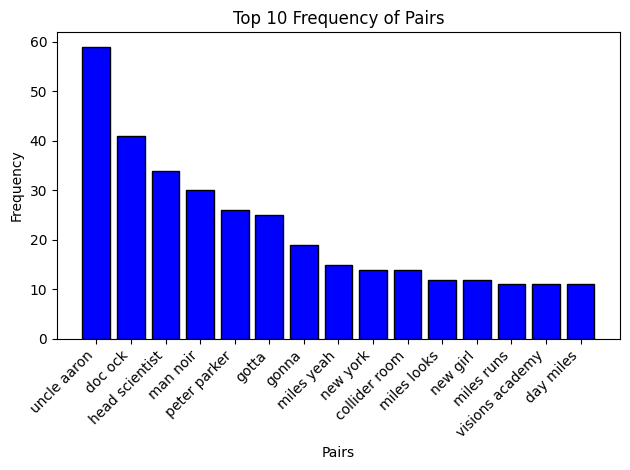

In [12]:
import matplotlib.pyplot as plt
from collections import Counter

# Assuming `doc` is defined and `ngrams` function is available
# Get bigrams as Span objects
data = list(ngrams(doc, 2))

# Count occurrences of each pair
pair_counts = Counter(span.text.lower() for span in data)

# Get the top 10 most common pairs
top_10_pairs = pair_counts.most_common(15)

# Extract pairs and their frequencies
pairs, frequencies = zip(*top_10_pairs)

# Plot histogram
plt.bar(pairs, frequencies, color='blue', edgecolor='black')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.xlabel('Pairs')
plt.ylabel('Frequency')
plt.title('Top 10 Frequency of Pairs')

# Show plot
plt.tight_layout()
plt.show()

### NER with Spider-Verse

Practice NER with Your Neighbor!

In [13]:
!python -m spacy download en_core_web_lg
nlp2 = spacy.load('en_core_web_lg')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 400.7/400.7 MB 3.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [14]:
import pandas as pd

doc_ner = nlp2(spidey_text)

# Create a list to collect entity data before adding it to the dataframe
entities_data = []

# For each identified named entity, store its text, start, end, and label
for ent in doc_ner.ents:
    entities_data.append({
        'text': ent.text.lower(),
        'label': ent.label_
    })

# Convert the list of entities into a DataFrame
ent_df = pd.DataFrame(entities_data)

# Display the dataframe
ent_df

,text,label
0,﻿spider,CARDINAL
1,phil lord,PERSON
2,rodney rothman story,PERSON
3,phil lord,PERSON
4,"dec. 3, 2018",DATE
...,...,...
2425,first,ORDINAL
2426,130,CARDINAL
2427,miguel,PERSON
2428,1967,DATE


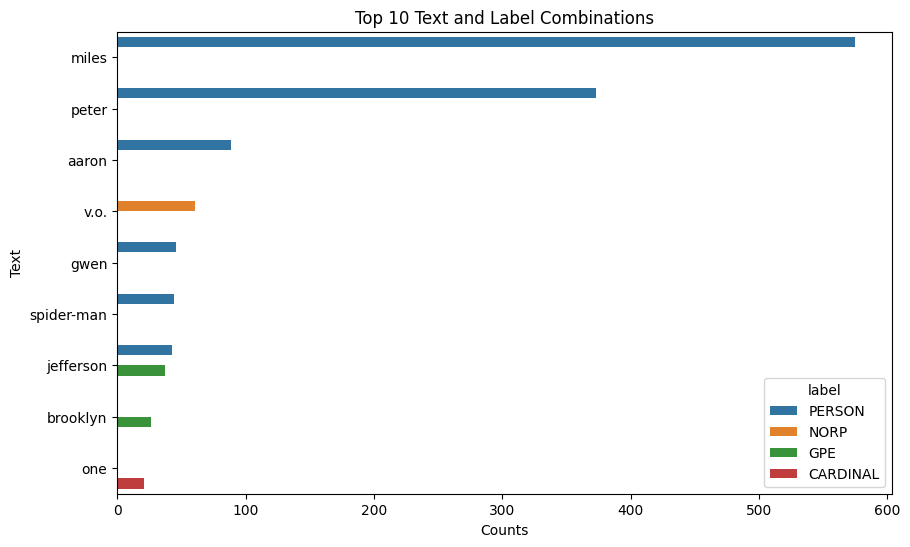

In [15]:
# Import seaborn and plt for better graphs
import seaborn as sns
import matplotlib.pyplot as plt

# Modify dataset for visualization
top_10_ents = ent_df[['text', 'label']].value_counts().head(10).reset_index(name='counts')

# Plotting counts for each combination of text and label
plt.figure(figsize=(10, 6))
sns.barplot(x='counts', y='text', data=top_10_ents, hue = "label")

# Add labels and title
plt.title('Top 10 Text and Label Combinations')
plt.xlabel('Counts')
plt.ylabel('Text')

# Display the plot
plt.show()